In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Para melhorar a visualização as células de código foram omitidas.
Para ativar ou desativar a visualização do código, clique <a href="javascript:code_toggle()">aqui</a>.''')

Helena Pato Magalhães - 2017095723

Rafael Gonçalves de Oliveira - 2017014685

# Introdução

O eterno embate entre popularidade e qualidade de um produto midiático sempre foi um tópico de interesse daqueles que o consomem. A maioria das pessoas gostaria que aquele produto que tanto admira seja considerado de qualidade, afinal ninguém gosta de ouvir que uma obra adorada é inferior. Porém, muitos trabalhos independem da opinião de um especialista para ganharem o coração do público. Os Video Games não são uma excessão. Enquanto jogos avaliados por críticos especialistas como obras primas costumam fazer sucesso, existem também os que são considerados medíocres e mesmo assim vendem milhões pelo mundo.

De outro modo, podemos analisar também mais um aspecto que influencia enormemente no êxito comercial de um Video Game, seu gênero. É sabido que jogos violentos normalmente são o centro das atenções, mas existem vários outros tipos de jogos que bombam no mercado. Isso também traz uma reflexão em relação às populações que consomem a maior quantidade de um determinado gênero de entretenimento, já que de uma forma ou de outra, esses elementos influenciam na formação do jogador.

# Metodologia

Para analisar essas relações, utilizamos uma [base de dados](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/version/2) sobre Video Games que venderam pelo menos 10 000 cópias, entre 1980 e 2016, gerada a partir do site [VGChartz](http://www.vgchartz.com/). Essa base de dados inclui os seguintes elementos:

•	Name - Nome do Jogo

•	Platform - Console para o qual o jogo foi laçado

•	Year - Ano de lançamento do jogo

•	Genre - Gênero do jogo

•	Publisher - Empresa responsável por publicar o jogo

•	NA_Sales - Vendas na América do Norte (em milhões)

•	EU_Sales - Vendas na Europa (em milhões)

•	JP_Sales - Vendas no Japão (em milhões)

•	Other_Sales - Vendas no resto do mundo (em milhões)

•	Global_Sales - Vendas totais no mundo

•	Critic_score - Pontuação agregada compilada pelos funcionários do site [Metacritic](https://www.metacritic.com/)

•	Critic_count - Número de críticos usado para gerar Critic_score

•	User_score - Pontuação dada pelos usuários do site Metacritic

•	User_count - Número de usuários que votaram na User_score

•	Developer - Desenvolvedores do jogo

•	Rating - Classificação indicativa dada pela [ESRB](https://www.esrb.org/) (Entertainment Software Rating Board)

O modelo utilizado para avaliar a relação entre a avaliação dos críticos e as vendas globais foi a regressão linear simples, já que pelos plots abaixo a relação parece aproximadamente linear, além de que queríamos relacionar apenas esses dois aspectos. Já para vermos como o gênero influencia nas vendas em cada parte do mundo, utilizamos um classificador kNN, que tentaria prever a qual gênero (classe) pertence o jogo de acordo com suas vendas nessas regiões geográficas.

# Resultados

## Caracterização

Inicialmente temos a apresentação dos dados, em forma de tabela para melhor visualização. Os jogos estão ordenados de forma decrescente em relação às vendas globais, e de cara já podemos ver a disparidade entre o primeiro e o segundo colocados. O primeiro, _Wii Sports_, tem mais do que o dobro de cópias vendidas do que o segundo, _Super Mario Bros_. Isso occoreu pois o _Wii Sports_ era vendido juntamente com o seu console, _Nintendo Wii_, assim essas vendas representam mais o consumo do console do que do jogo específico.

In [2]:
import pandas as pd

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

df = df.drop([5936, 14086, 16222, 16385]) # Removendo Jogos de 2017 e 2020 
#2020 -> 5936
#2017 -> 14086, 16222, 16385
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Agora, damos uma olhada um pouco mais profunda nas estatísticas dos dados, explicando cada aspecto observado com os gráficos abaixo. Uma característica a se notar é que o número de avaliações de críticos é praticamente a metade do número de jogos, assim muitos jogos não tinham avaliação no site Metacritic.

In [3]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')#User_Score era do dtype object que é omitido por padrão, ai tem que converter
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,0.533649,68.967679,26.360821,7.125046,162.229908
std,5.877050,0.813604,0.503339,0.308853,0.186731,1.548104,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


Primeiramente, podemos perceber que a maior parte dos jogos foi lançado entre 2003 e 2010.

In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [6, 4]

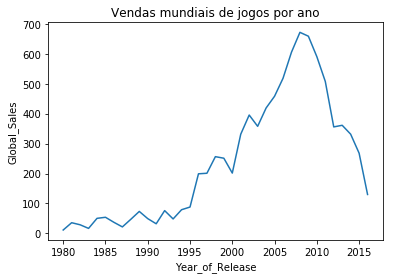

In [5]:
df1 = df.copy()
df1 = df1[['Year_of_Release', 'Global_Sales']]
df1 = df1.groupby('Year_of_Release').sum()
plt.title('Vendas mundiais de jogos por ano')
plt.xlabel('Year_of_Release')
plt.ylabel('Global_Sales')
plt.plot(df1)

Isso pode ser explicado pelo fato de que vários dos consoles presentes na lista foram lançados nessa época (_Nintendo DS - 2004, PlayStation 3 - 2006, Nintendo Wii - 2006, Xbox 360 - 2005, PlayStation Portable - 2004_), em que os Video Games estavam se tornando interesse do público mais geral.

In [6]:
plt.rcParams["figure.figsize"] = [15, 6]

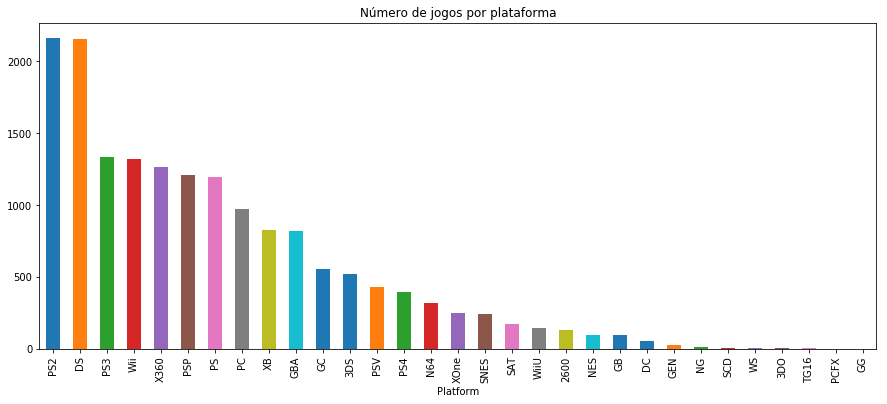

In [7]:
df1 = df.copy()
df1 = df1.groupby(['Platform']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por plataforma')
df1.plot.bar()

Podemos perceber também que, apesar de alguns jogos venderem até 40 milhões, a maioria absoluta vendeu entre 0,01 e 10 milhões.

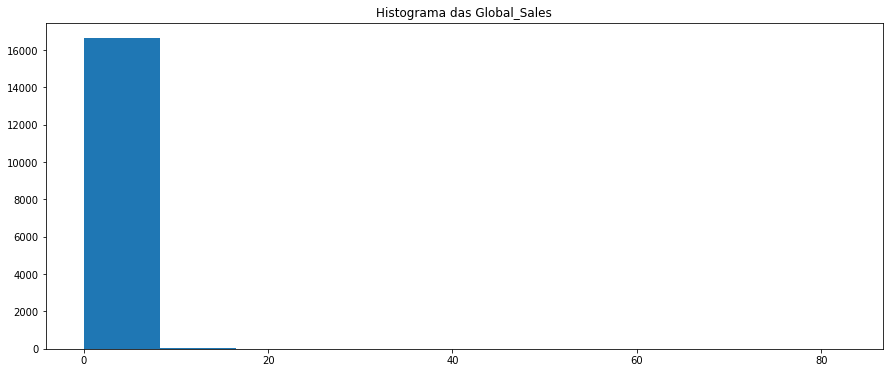

In [8]:
df1 = df['Global_Sales']
plt.hist(df1)
plt.title('Histograma das Global_Sales')
pass

Quanto às avaliações dos críticos, como o esperado, é majoritariamente mediana, entre 60 e 79 pontos (em um total de 100).

In [9]:
plt.rcParams["figure.figsize"] = [6, 4]

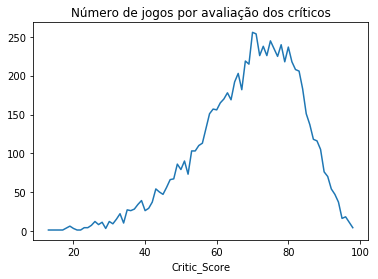

In [10]:
df1 = df.copy()
df1 = df1.groupby(['Critic_Score']).count()
df1 = df1['Name']
df1
plt.title('Número de jogos por avaliação dos críticos')
plt.xlabel('Critic_Score')
plt.plot(df1)

No gráfico abaixo, podemos visualizar qual a quantidade de jogos de cada gênero no nosso conjunto de dados. Os jogos de ação lideram sem muita concorrência. Os jogos de esportes que vêm em seguida, ainda possuem uma boa vantagem sobre os demais. Depois, o resto se distribui mais uniformemente. Por fim, os jogos de puzzle são os menos contemplados.

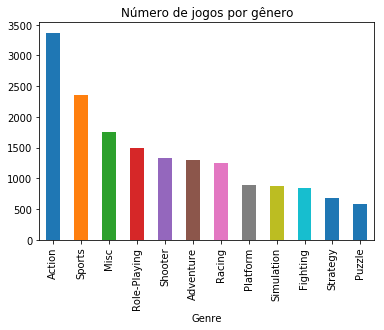

In [11]:
df1 = df.copy()
df1 = df1.groupby(['Genre']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por gênero')
df1.plot.bar()
pass

Em relação às classificações indicativas, temos a predominância da faixa E, anteriormente chamada de K-A. O que é surpreendente é a faixa E10+ estar em menor quantidade do que a M, sendo que o público dos jogos ainda é majoritariamente jovem, apesar disso a faixa AO tem uma presença bem menos expressiva.

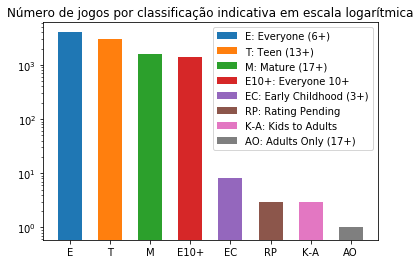

In [12]:
df1 = df.copy()
df1 = df1.groupby(['Rating']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
siglas = ['NA','E','T','M','E10+','EC','RP','K-A','AO']
labelsCompletos = ['E: Everyone (6+)','T: Teen (13+)','M: Mature (17+)','E10+: Everyone 10+','EC: Early Childhood (3+)','RP: Rating Pending','K-A: Kids to Adults','AO: Adults Only (17+)']
fig, ax = plt.subplots()
for i in range(len(df1.index)):
    ax.bar(i+10, df1[i], label=labelsCompletos[i], width=0.6,log=True)
    
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
ax.set_xticklabels(siglas)
plt.title('Número de jogos por classificação indicativa em escala logarítmica')
ax.legend()
plt.show()
plt.close()

## Previsão

### Vendas globais e avaliações dos críticos

Vamos abordar agora a nossa reflexão inicial, será que o número de vendas é influenciado pela avaliação dos críticos? De outro modo, a qualidade do jogo causa um maior sucesso comercial?

O gráfico abaixo ilustra a relação entre essas duas variáveis. Inicialmente parece que as vendas aumentam em conjunto com a nota do jogo.

In [13]:
plt.rcParams["figure.figsize"] = [10, 15]

Text(0.5, 1.0, 'Vendas globais por avaliação dos críticos')

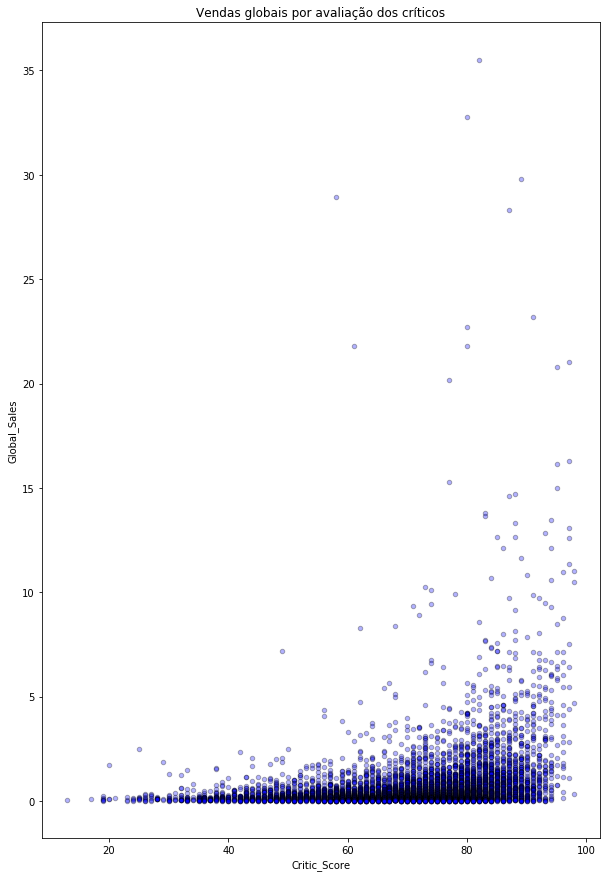

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

new_df = df.copy()
new_df = new_df.drop([0])
# Removi o jogo Wii Sports porque ele é vendido juntamente com o console Nintendo Wii,
# então suas vendas eram absurdamente maiores do que o resto
new_df = new_df.dropna() # Removi os valores NaN
# Plotei as variáveis para ter uma noção inicial
new_df.plot.scatter(x='Critic_Score', y='Global_Sales', color='blue', alpha=0.3, edgecolor='k')
plt.title('Vendas globais por avaliação dos críticos')

In [15]:
from sklearn.model_selection import train_test_split

# Escolhi qual variável será X e qual será y e as separei em treino e teste
X = new_df['Critic_Score'].values
X = X.reshape(-1, 1)
y = new_df['Global_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Modelo da regressão linear
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Agora utilizamos uma regressão linear para tentar prever o comportamento dessa relação. Podemos ver que o $ R^2 $ ficou bem baixo, mas o erro também não foi muito grande.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Avaliando o modelo
#print('Coeficiente: ', model.coef_)
#print('Intercepto: ', model.intercept_)
print("Erro quadrático médio: %.2f" % mean_squared_error(y_test, prediction))
print('r2: %.2f' % r2_score(y_test, prediction)) # r2 = 1: previsão perfeita

Erro quadrático médio: 2.78
r2: 0.07


Apesar disso, quando plotamos um gráfico para visualizarmos o resultado, a linha parece ter capturado bem a tendência dos pontos.

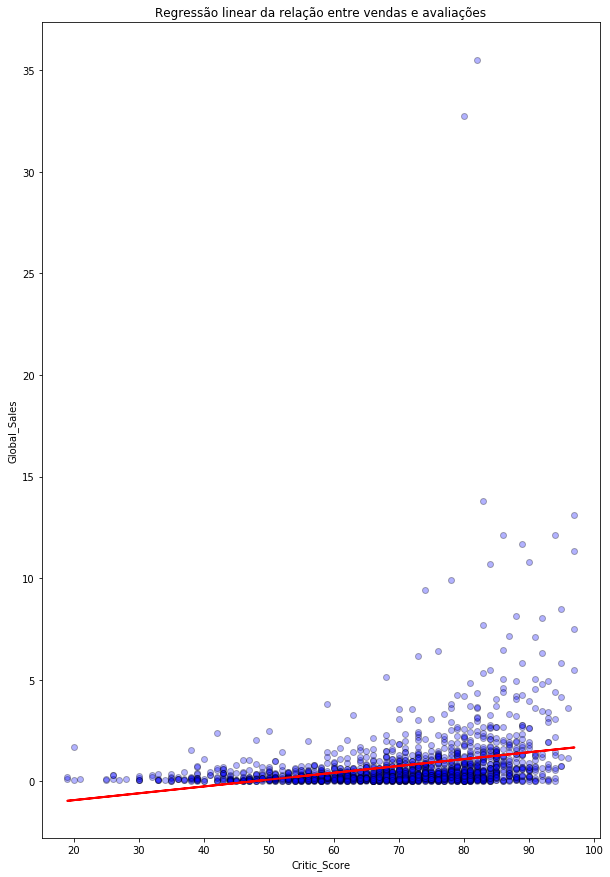

In [17]:
# Plotando o resultado
plt.scatter(X_test, y_test,  color='blue', alpha=0.3, edgecolor='k')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.title('Regressão linear da relação entre vendas e avaliações')
plt.xlabel('Critic_Score')
plt.ylabel('Global_Sales')

plt.show()

Por fim, faremos um teste de hipótese, por permutação, considerando a hipótese nula como _"A qualidade de um jogo não influencia nas suas vendas"_, ou seja, as vendas são uniformemente distribuídas, independentemente da qualidade. Calculamos então o p-valor para essa hipótese.

In [18]:
from sklearn.model_selection import permutation_test_score

# Teste de hipótese por permutação
score, permutation_scores, pvalue = permutation_test_score(model, X_test, prediction, cv=3)
print("Pontuação da classificação %s \np-valor : %s" % (score, pvalue))

Pontuação da classificação 1.0 
p-valor : 0.009900990099009901


Como o p-valor é muito pequeno podemos inferir que a hipótese nula não é válida, ou seja, as vendas e a qualidade do jogo tem, sim uma relação.

### Gênero e vendas por região

Mudando agora para outro tópico, investigaremos o vínculo entre o gênero dos jogos e suas vendas nas várias regiões do mundo. No gráfico abaixo, já podemos ver a predominância de jogos de ação, como já visto anteriormente, mas uma coisa que podemos perceber melhor agora, é como as regiões da América do Norte, Europa e Outras seguem um padrão muito parecido, enquanto o Japão segue outro bastante diferente.

In [19]:
plt.rcParams["figure.figsize"] = [15, 6]

Text(0.5, 1.0, 'Vendas de jogos por gênero em escala logrítimica')

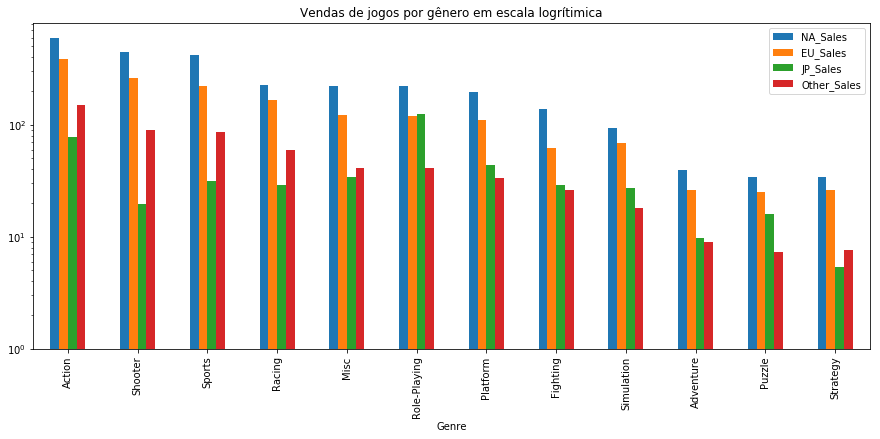

In [20]:
d = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df1 = new_df[d]
df1 = df1.groupby(['Genre']).sum()
df1 = df1.sort_values(by='NA_Sales', ascending=False)
df1.plot.bar(log=True)
plt.title('Vendas de jogos por gênero em escala logrítimica')

In [21]:
X = new_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].values
y = new_df['Genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=40, weights='distance')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Vamos então, usar um classificador kNN para tentar prever, de acordo com as vendas nessas regiões, o gênero de um jogo. Abaixo temos as métricas que avaliaram esse modelo.

In [23]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, prediction, average='macro')
print('Precisão: ', precision, '\nRevocação: ', recall, '\nF1: ', fscore)
print('Pontuação da classificação: ', model.score(X_test, y_test))

Precisão:  0.16346470767299767 
Revocação:  0.13842471006185827 
F1:  0.13531471255203253
Pontuação da classificação:  0.23681125439624853


As métricas parecem bem ruins, plotamos então uma matriz de confusão para visualizar. Parece que nosso classificador está classificando muitos jogos de outros gêneros como jogos de ação. Isso pode ser dar pela abundância de jogos dese tipo em relação aos outros, já conferida anteriormente.

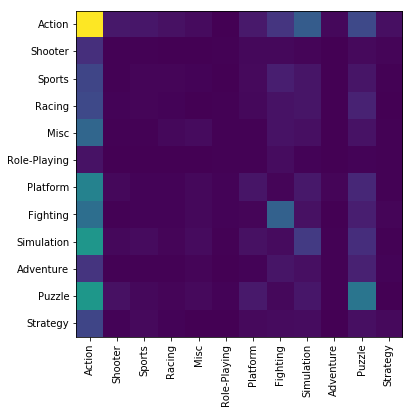

In [24]:
from sklearn.metrics import confusion_matrix

plt.imshow(confusion_matrix(y_test, prediction))
labels = df1.index
labels = pd.Series(labels)
plt.imshow(confusion_matrix(y_test, prediction))
plt.xticks(labels.index, labels, rotation=90)
plt.yticks(labels.index, labels)
pass

In [25]:
#from sklearn.linear_model import LogisticRegression
genres = ["Action","Adventure","Fighting","Misc","Platform","Puzzle","Racing","Role-Playing","Shooter","Simulation","Sports","Strategy"]
teste_df = [0]*len(genres)
for i in range(len(genres)):
    teste_df[i] = new_df[new_df['Genre'] == genres[i]].sample(1136, replace=True)

sample_df = pd.concat(teste_df)

X = sample_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].values
y = sample_df['Genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
model = KNeighborsClassifier(n_neighbors=40, weights='distance')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Para contornar esse problema fizemos então, uma nova classificação utilizando amostras de tamanho 2*média aritimética da quantidade de jogos. Assim os resultados ficaram bem melhores.

In [27]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, prediction, average='macro')
print('Precisão: ', precision, '\nRevocação: ', recall, '\nF1: ', fscore)
print('Pontuação da classificação: ', model.score(X_test, y_test))

Precisão:  0.6190539630924193 
Revocação:  0.605135978340236 
F1:  0.5978612647808746
Pontuação da classificação:  0.6038732394366197


E a diagonal da matriz de confusão ficou bem clara, ou seja, nosso classficador está acertando bastante em suas tentativas.

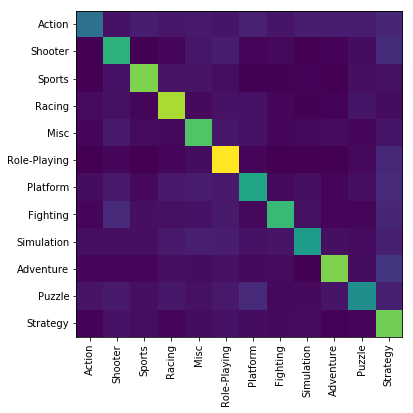

In [28]:
plt.imshow(confusion_matrix(y_test, prediction))
labels = df1.index
labels = pd.Series(labels)
plt.imshow(confusion_matrix(y_test, prediction))
plt.xticks(labels.index, labels, rotation=90)
plt.yticks(labels.index, labels)
pass

Por último, fazemos um teste de hipótese, por permutação, em que a hipótese nula seria a de que _"O gênero não influencia nas vendas do jogo em cada região do globo"_. Novamente, calculamos o p-valor para essa hipótese.

In [29]:
# Teste de hipótese por permutação
score, permutation_scores, pvalue = permutation_test_score(model, X_test, prediction, cv=3)
print("Pontuação da classificação %s \np-valor : %s" % (score, pvalue))

Pontuação da classificação 0.6995098630625439 
p-valor : 0.009900990099009901


Com um valor reduzido, podemos concluir que a hipótese nula deve ser rejeitada, e o gênero do jogo tem impacto no seu sucesso comercial pelo mundo.

# Conclusões

Os resultados da nossa exploração dos dados foram bastante esclarecedores. Como visto através das previsões e dos gráficos, a pontuação de um jogo tem sim uma relação direta com seu sucesso comercial, mas ela não é absoluta. Ela parece ser mais verdadeira ao olharmos para os jogos que tem uma classificação ruim, e constatarmos que eles vendem pouco. Porém, também vemos que existem vários jogos bem classificados que não foram muito consumidos. Assim, nossa função de regressão ficou com uma inclinação um pouco diferente da realmente representada pelos pontos, e as métricas usadas para avaliá-la não foram muito boas.

Quanto à influência do gênero nas vendas por região, nossos resultados foram bem melhores. Pudemos contrastar bem a popularidade de jogos, por exemplo de ação na América do Norte, com a de jogos de RPG no Japão. Além disso, concluímos que esses dois aspectos são sim, bastante correlacionados e serviram bem para a classificação realizada. Inicialmente tivemos uma desigualdade entre as classes que, depois, conseguimos contornar.

Conseguimos também visualizar outros aspectos gerais dos dados que podem esclarecer sobre os nossos resultados anteriores. Por exemplo, existe uma quantidade absurdamente maior de jogos que venderam menos de 10 milhões de cópias do que de todo o resto, o que influencia na precisão da nossa regressão. Outra observação seria que os três consoles da _Sony: PlayStation , PlayStation 2 e PlayStation 3_ , aparecem entre os mais contemplados no dataset, e essa empresa é conhecida por jogos mais adultos do que, digamos, a _Nintendo_, o que pode tanto explicar a grande quantidade de jogos classificados como M pela ESRB, quanto a de jogos de ação e de tiro.

Por fim, aprendemos bastante sobre o mercado de Video Games, sua distribuição e qualidade com esse estudo. 

[Vídeo da apresentação no youtube.](https://www.youtube.com/watch?v=8a3kgH6a2Ms&feature=youtu.be)